In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
atlas = pd.read_excel("atlas2013_dadosbrutos_pt.xlsx", sheet_name=1, 
          usecols=['ANO', 'UF', 'Município', 'ESPVIDA', 'FECTOT', 'MORT1', 'SOBRE60', 'T_ENV', 'E_ANOSESTUDO', 'T_ANALF11A14', 'T_ANALF25M', 'T_ATRASO_0_BASICO', 'T_ATRASO_2_BASICO', 'T_FLPRE', 'T_FLSUPER', 'T_FREQSUPER1517', 'T_SUPER25M', 'T_MED25M', 'GINI', 'PIND', 'PINDCRI', 'PMPOB', 'PMPOBCRI', 'RDPC', 'CPR', 'EMP', 'P_AGRO', 'P_COM', 'P_CONSTR', 'P_EXTR', 'P_FORMAL', 'P_FUND', 'P_MED', 'P_SERV', 'P_SIUP', 'P_SUPER', 'T_DES2529', 'TRABCC', 'TRABPUB', 'TRABSC', 'T_AGUA', 'T_BANAGUA', 'T_DENS', 'T_LIXO', 'T_LUZ', 'AGUA_ESGOTO', 'PAREDE', 'T_CRIFUNDIN_TODOS', 'T_FORA4A5', 'T_FORA6A14', 'T_FUNDIN_TODOS', 'T_FUNDIN_TODOS_MMEIO', 'T_FUNDIN18MINF', 'T_M10A14CF', 'T_M15A17CF', 'T_MULCHEFEFIF014', 'T_NESTUDA_NTRAB_MMEIO', 'T_OCUPDESLOC_1', 'T_RMAXIDOSO', 'T_SLUZ', 'HOMEMTOT', 'MULHERTOT', 'pesoRUR', 'pesotot', 'pesourb', 'POP', 'IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R'], 
          dtype={'UF': str}).rename(columns={'ESPVIDA': 'expec_vida', 'FECTOT': 'taxa_fecund', 'SOBRE60': '%sobreviver_60a', 'T_ENV': 'taxa_envelh', 'E_ANOSESTUDO': 'expec_anos_estudo_18'})
atlaspb = atlas.groupby(atlas['UF']).get_group('25')
atlaspb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669 entries, 1241 to 12593
Data columns (total 70 columns):
ANO                      669 non-null int64
UF                       669 non-null object
Município                669 non-null object
expec_vida               669 non-null float64
taxa_fecund              669 non-null float64
MORT1                    669 non-null float64
%sobreviver_60a          669 non-null float64
taxa_envelh              669 non-null float64
expec_anos_estudo_18     669 non-null float64
T_ANALF11A14             669 non-null float64
T_ANALF25M               669 non-null float64
T_ATRASO_0_BASICO        669 non-null float64
T_ATRASO_2_BASICO        669 non-null float64
T_FLPRE                  669 non-null float64
T_FLSUPER                669 non-null float64
T_FREQSUPER1517          669 non-null float64
T_MED25M                 669 non-null float64
T_SUPER25M               669 non-null float64
GINI                     669 non-null float64
PIND                

Text(0.5, 1.0, 'Correlação dos 70 indicadores')

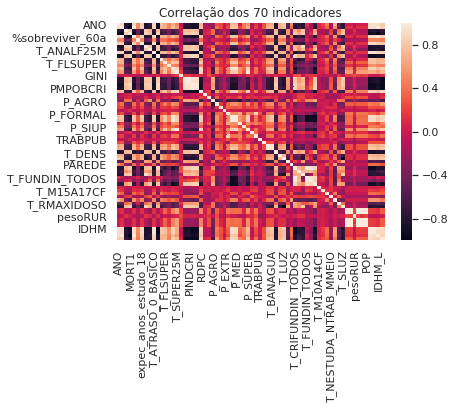

In [3]:
corr = atlaspb.corr()
sns.heatmap(corr)
plt.title("Correlação dos 70 indicadores")

In [4]:
corr_idhme = atlaspb.corr().loc['IDHM_E'].sort_values(ascending=False).to_frame().reset_index().rename(columns = {'index': 'indicador'})[:10]
corr_idhme

,indicador,IDHM_E
0,IDHM_E,1.000000
1,IDHM,0.987204
2,T_ATRASO_0_BASICO,0.957002
3,P_FUND,0.928110
4,ANO,0.927872
5,%sobreviver_60a,0.918045
6,expec_anos_estudo_18,0.913576
7,expec_vida,0.911137
8,IDHM_L,0.911116
9,P_MED,0.901594


Text(0.5, 1.0, 'Métricas com alta similaridade com o IDHME ')

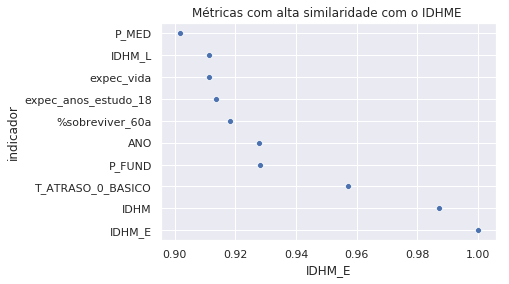

In [5]:
sns.scatterplot(y="indicador", x="IDHM_E", data=corr_idhme)
plt.title("Métricas com alta similaridade com o IDHME ")

In [6]:
corr_idhmr = atlaspb.corr().loc['IDHM_R'].sort_values(ascending=False).to_frame().reset_index().rename(columns = {'index': 'indicador'})[:10]
corr_idhmr.sort_values(by='IDHM_R')

,indicador,IDHM_R
9,T_ATRASO_0_BASICO,0.853064
8,%sobreviver_60a,0.855228
7,expec_vida,0.858879
6,IDHM_L,0.858934
5,P_MED,0.878114
4,P_FUND,0.892980
3,IDHM_E,0.894889
2,RDPC,0.923688
1,IDHM,0.932659
0,IDHM_R,1.000000


Text(0.5, 1.0, 'Métricas com alta similaridade com o IDHMR ')

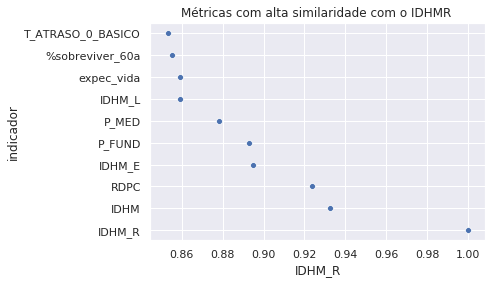

In [7]:
sns.scatterplot(y="indicador", x="IDHM_R", data=corr_idhmr)
plt.title("Métricas com alta similaridade com o IDHMR ")

In [8]:
corr_idhml = atlaspb.corr().loc['IDHM_L'].sort_values(ascending=False).to_frame().reset_index().rename(columns = {'index': 'indicador'})[:10]
corr_idhml

,indicador,IDHM_L
0,IDHM_L,1.000000
1,expec_vida,0.999996
2,%sobreviver_60a,0.997638
3,IDHM,0.940563
4,ANO,0.911881
5,IDHM_E,0.911116
6,T_ATRASO_0_BASICO,0.879077
7,IDHM_R,0.858934
8,expec_anos_estudo_18,0.847036
9,P_FUND,0.809581


Text(0.5, 1.0, 'Métricas com alta similaridade com o IDHML ')

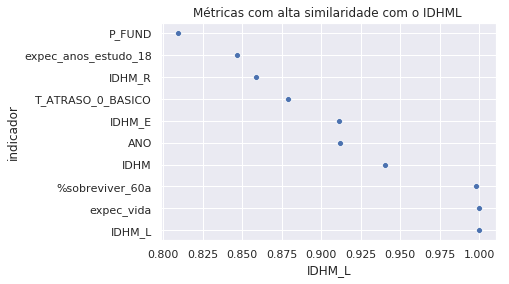

In [9]:
sns.scatterplot(y="indicador", x="IDHM_L", data=corr_idhml)
plt.title("Métricas com alta similaridade com o IDHML ")